<h1 align='center'>
<span style='color:navy'>
<b>
USING LOGISTIC REGRESSION CLASSIFIES A PERSON HAVING HEART DISEASE
</b>
</span>
</h1>

<br>

## **Process**

1. Analyze and Preprocess data: Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Train-Test split
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is the main metric and why? Which solver and penalty have chosen?

In this notebook, we will measure performance of our model by using F1-Score.

<br>
<h2 align='center'>
<p style='background:black; color: blue'>
<b>
 1| Read and Load Dataset
</b>
</p>
</h2>

This dataset describe the information of person and result that they are having heart disease or not.

- **age**: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- **sex**: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- **cp** (ChestPainType): This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- **trestbps** (RestingBP): This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200].
- **chol** (Cholesterol): This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564].
- **fbs** (FastingBS): This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- **restecg** (RestingECG): This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- **thalach**: Patient's highest heart rate.
- **exang** (ExerciseAngina): Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- **oldpeak**: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2].
- **slope** (ST_Slope): Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- **ca**: number of major vessels (0-3) colored by flourosopy - given.
- **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect.
- **target** (HeartDisease): Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as ss

<br>

### **Load and Desribe dataset**

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1


In [3]:
df.shape

(886, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,886.0,54.007901,9.126292,29.0,47.0,54.0,60.0,77.0
sex,886.0,0.683973,0.465186,0.0,0.0,1.0,1.0,1.0
cp,886.0,1.005643,1.024542,0.0,0.0,1.0,2.0,3.0
trestbps,886.0,132.117381,16.807511,94.0,120.0,130.0,140.0,200.0
chol,886.0,247.497743,47.209995,126.0,212.0,245.0,274.0,564.0
fbs,886.0,0.168172,0.374230,0.0,0.0,0.0,0.0,1.0
restecg,886.0,0.495485,0.526669,0.0,0.0,0.0,1.0,2.0
thalach,886.0,149.492099,23.921327,71.0,133.0,153.0,166.0,206.0
exang,886.0,0.310384,0.462912,0.0,0.0,0.0,1.0,1.0
oldpeak,886.0,1.083296,1.147935,0.0,0.0,0.8,1.8,6.2


<br>
<h2 align='center'>
<p style='background:black; color: blue'>
<b>
2| Visualize Dataset
</b>
</p>
</h2>

In [5]:
# for ploting:
import matplotlib.pyplot as plt
import seaborn as sns

# optional:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# set font for ploting
font = {'fontsize': 16,
        'fontstyle': 'italic',
        'backgroundcolor': 'black',
        'color': 'white'}

%matplotlib inline

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

We visualize our data by using histogram for all columns.

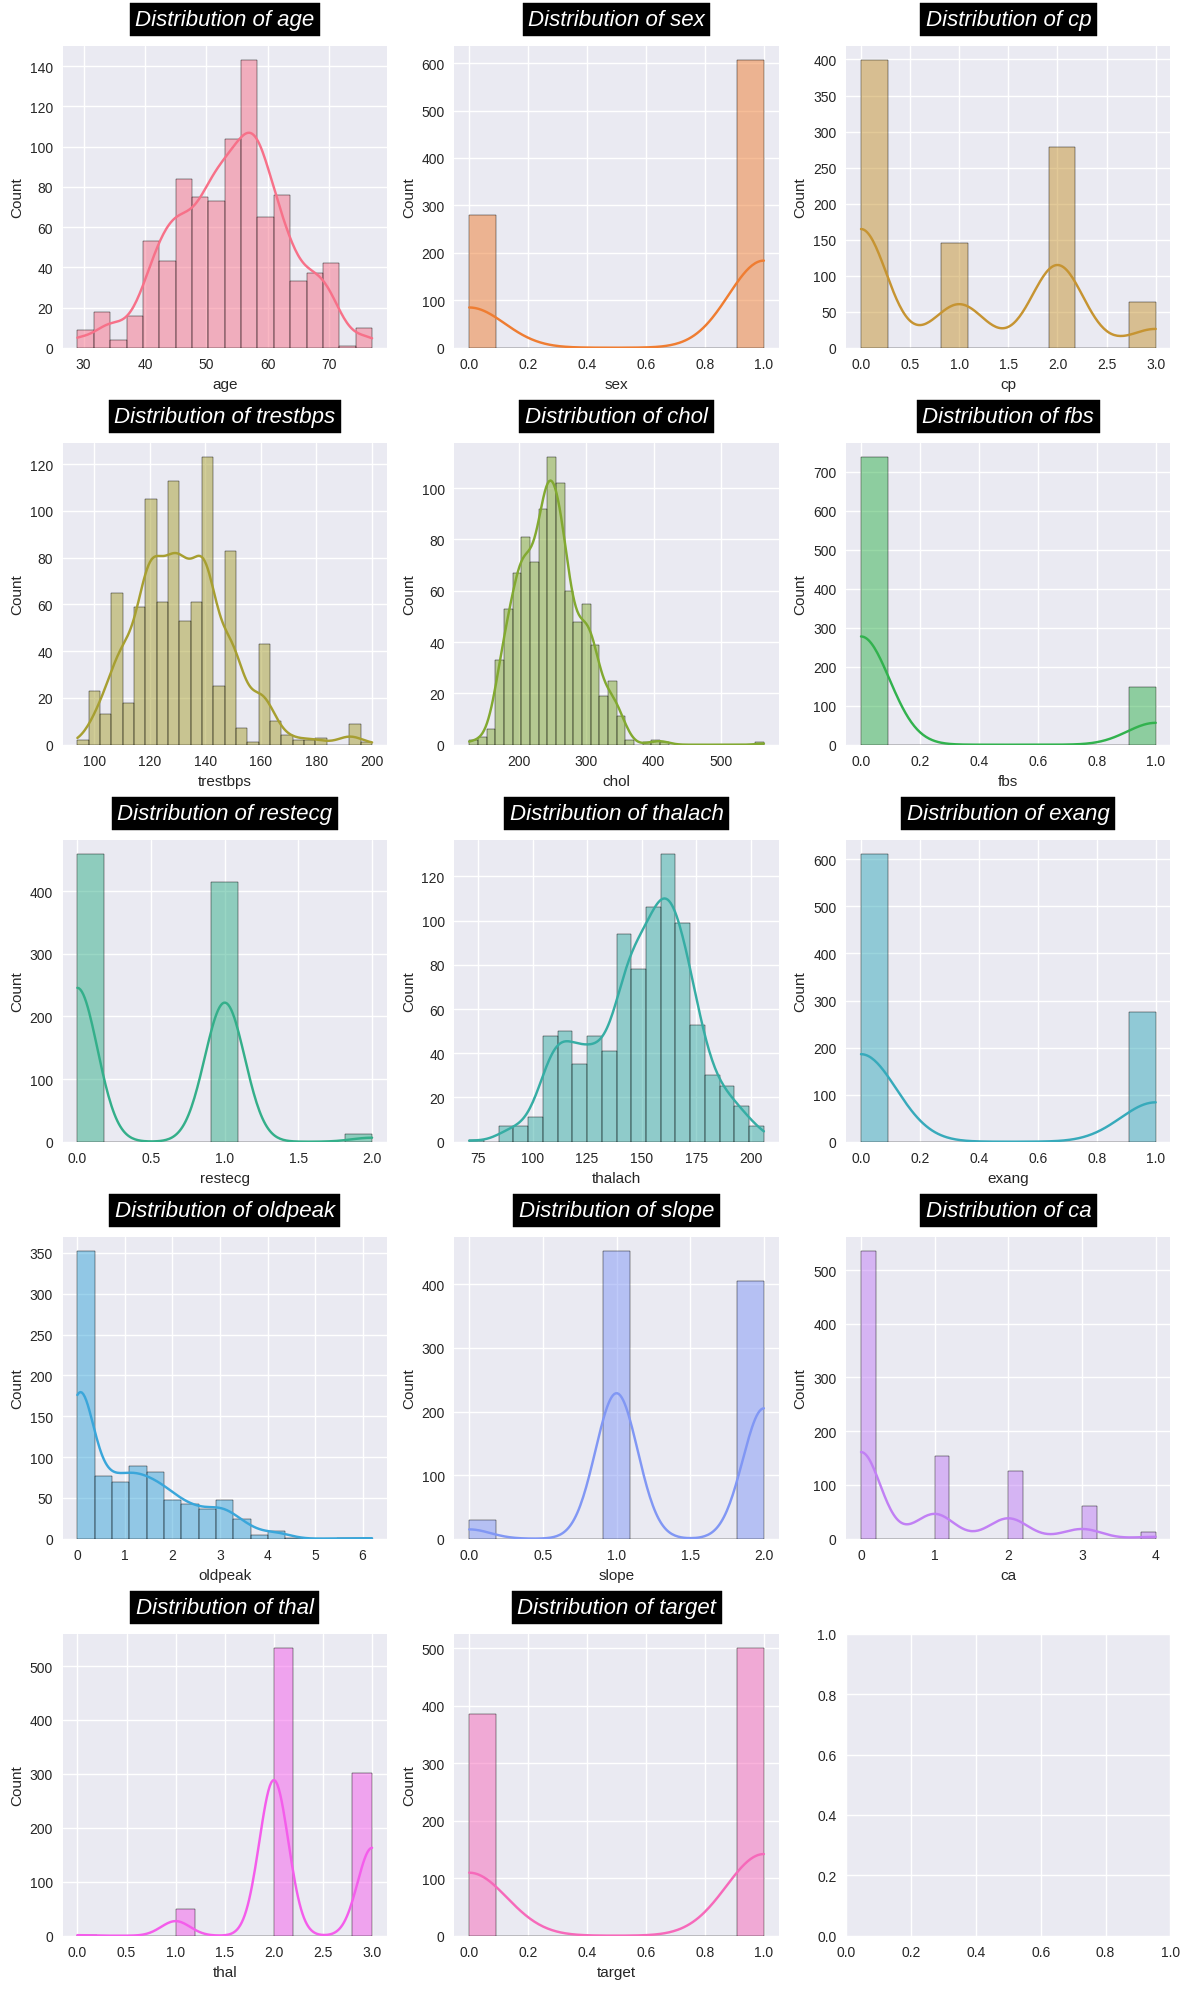

In [7]:
count_col = 3

fig, axes = plt.subplots(nrows=math.ceil(df.shape[1]/count_col), 
                         ncols=count_col,
                         figsize=(12, 20))

colors = sns.color_palette('husl', df.shape[1])

for i, col in enumerate(df.columns):
    r, c = i // count_col, i % count_col
    sns.histplot(data=df, x=col, ax=axes[r][c], kde=True, color=colors[i])
    axes[r][c].set_title(f'Distribution of {col}', fontdict=font, pad=15)
    
plt.tight_layout()
plt.show()            

<br>
<h2 align='center'>
<p style='background:black; color: blue'>
<b>
3| Preprocess Data
</b>
</p>
</h2>

<h3 align='center'>
<p style='background-color: lightblue'>
<span style='color:navy'>
<b>
3.1. Clean Data
</b>
</span>
</p>
</h3>

Now we check missing values of our dataset.

In [8]:
df.shape

(886, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We can see that our dataset don't have any missing value. Now we check duplicated value:

In [11]:
cleaned_df = df.drop_duplicates()
cleaned_df.shape

(886, 14)

<br>
<h3 align='center'>
<p style='background-color: lightblue'>
<span style='color:navy'>
<b>
3.2. Detect Outlier
</b>
</span>
</p>
</h3>

Before decided to eliminate any features, we using box plot to get an overview of the distribution of outliers.

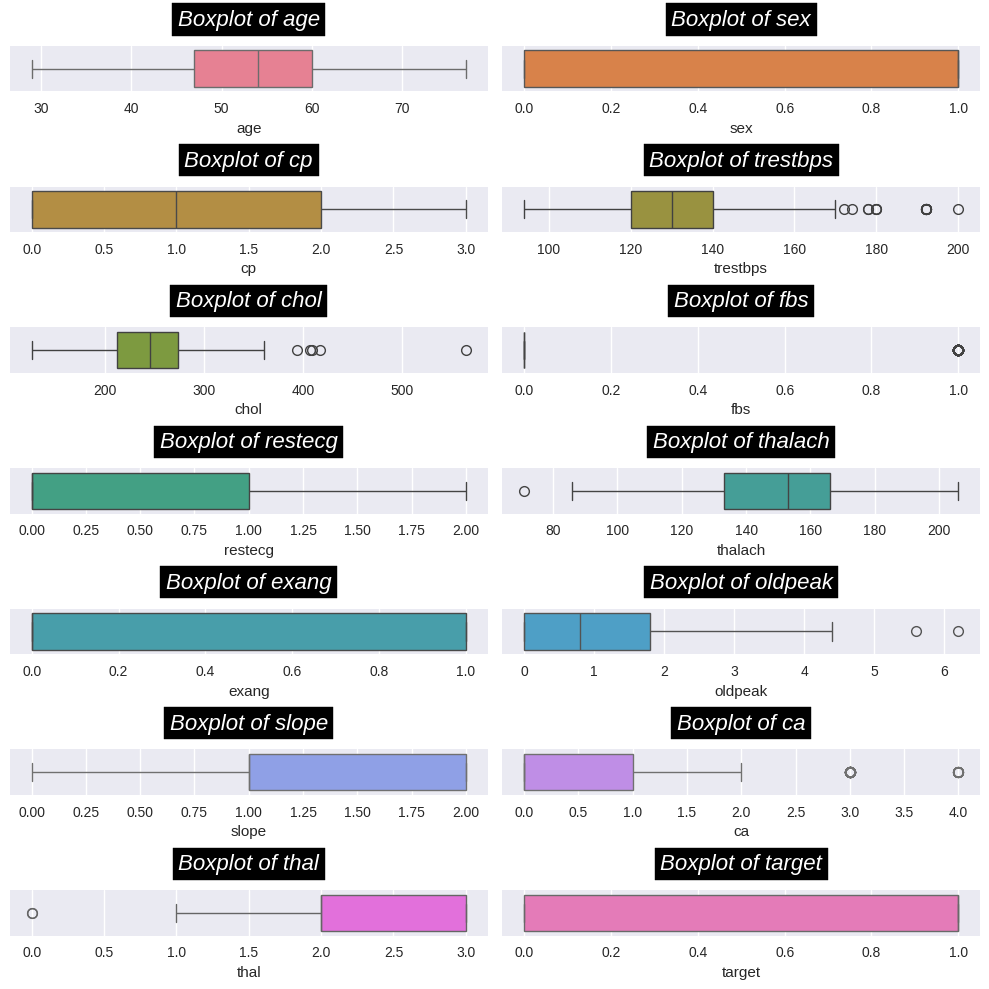

In [12]:
count_col = 2

fig, axes = plt.subplots(nrows=math.ceil(cleaned_df.shape[1]/count_col), 
                         ncols=count_col,
                         figsize=(10, 10))

colors = sns.color_palette('husl', cleaned_df.shape[1])

for i, col in enumerate(cleaned_df.columns):
    r, c = i // count_col, i % count_col
    sns.boxplot(data=cleaned_df, x=col, ax=axes[r][c], color=colors[i])
    axes[r][c].set_title(f'Boxplot of {col}', fontdict=font, pad=15)
    
plt.tight_layout()
plt.show()            

Based on all of the boxplots, trestbps, chol, fbs, oldpeak, ca and thal columns have outliers, especially column `fbs`.

In [13]:
def remove_outliers_by_using_quantile(df: pd.DataFrame, col: str, thresh: float=1.5) -> pd.DataFrame:
    
    ''' 
    Remove outlier if this data points not in [low_bound, upper_bound].
    '''
    
    print(f'Dataset shape Before remove outlier: {df.shape}')
    
    outliers = []
    
    for i, col in enumerate(df.columns):
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound, upper_bound = q1 - (thresh * iqr), q3 + (thresh * iqr)
        outliers.append( (df[col] < lower_bound) | (df[col] > upper_bound) )
        
        print(f'{df.columns[i]}: {outliers[i].sum()}')
        
        #Combine outliers across all columns
        outliers_idx = np.any(outliers, axis=0)
    
    # Remove outliers
    df = df[~outliers_idx]
        
    print(f'Dataset shape After remove outlier: {df.shape}')
    
    return df

<br>

To make sure with our decision, we draw the bar chart to see the ratio of all the features in each categorical columns. Therefore, we should classify which is the categorical columns in our dataset. First, we look the data again:

In [14]:
cleaned_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1


We easily to reliaze that all of the categorical columns:
- only have values '0', '1', '2' or '3'
- having the sum of all of the values in each column is *integer*.

Let define it: Because of all of the index greater than equal to 0, so if sum of values in the columns less than equal to 3 times total rows, we can believe that this is categorical columns.

In [15]:
categorical_df, numerical_df = [], []

for col in cleaned_df.columns:
    if ( int(sum(cleaned_df[col])) == sum(cleaned_df[col]) ) and ( sum(cleaned_df[col]) <= 3 * cleaned_df.shape[0] ):
        categorical_df.append(col)
    else:
        numerical_df.append(col)
        
print(f'categorical columns: {categorical_df}')
print(f'numerical_df: {numerical_df}')

categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_df: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


Now we draw the bar chart represents the relationship between all ò the categorical columns with `target`:

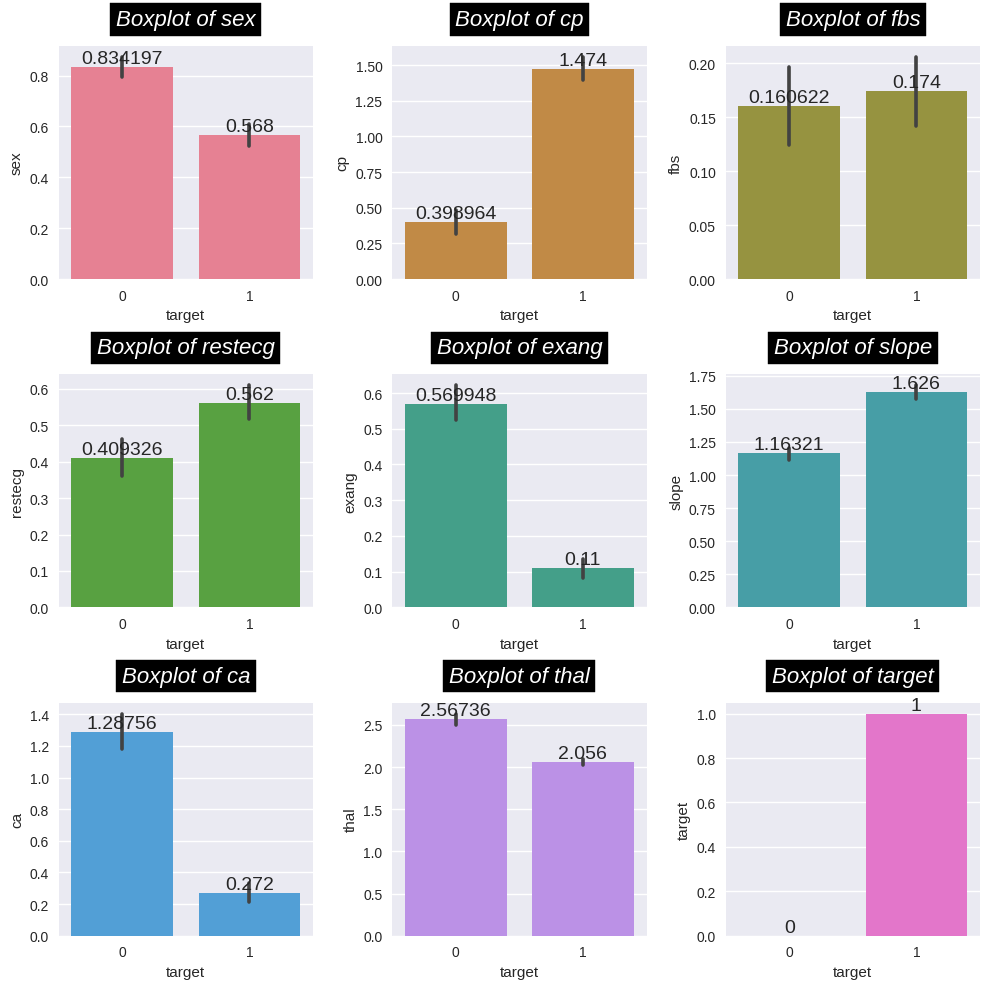

In [16]:
count_col = 3

fig, axes = plt.subplots(nrows=math.ceil(len(categorical_df)/count_col), 
                         ncols=count_col,
                         figsize=(10, 10))

colors = sns.color_palette('husl', len(categorical_df))

for i, col in enumerate(categorical_df):
    r, c = i // count_col, i % count_col
    sns.barplot(data=cleaned_df, x='target', y=categorical_df[i], ax=axes[r][c], color=colors[i])
    axes[r][c].bar_label(axes[r][c].containers[0], fontsize=14)
    axes[r][c].set_title(f'Boxplot of {col}', fontdict=font, pad=15)
    
    
plt.tight_layout()
plt.show()            

<br>

Now we evaluate the correclation among the features based on correlation matrix below:

<Axes: >

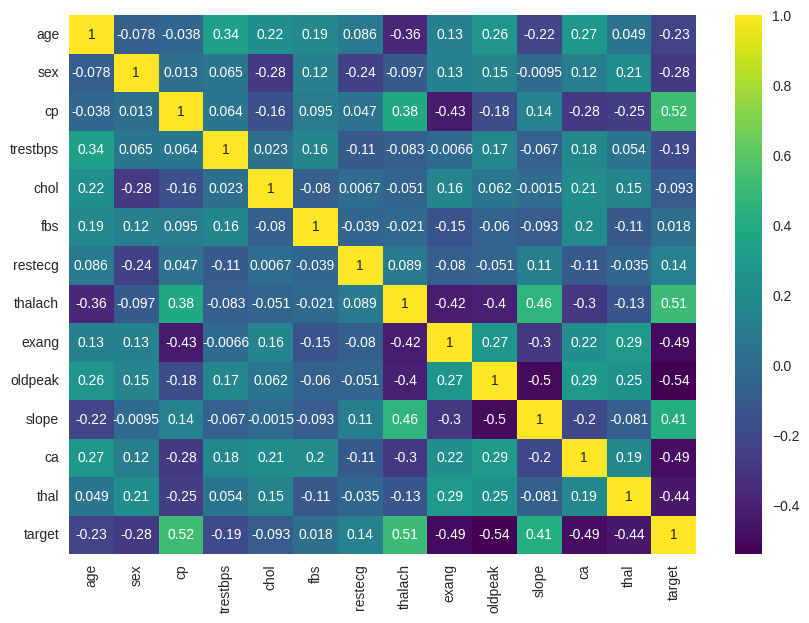

In [17]:
sns.heatmap(data=cleaned_df.corr(), cmap='viridis', annot=True, annot_kws={'size':10})

The last row show we the correlation between target and other features. We can see 3 columns has the highest positive correlation with target include:` cp(0.52)`, `thalach(0.51)` and `slope(0.41)` while `fbs(0.018)` and `chol(-0.093)` has the correlation index close to 0, meaning it is almost uncorrelated with target.

In [18]:
def remomve_uncorrelated_feature(df: pd.DataFrame, thresh: float = 0.1) -> pd.DataFrame:
    
    uncorrelated_cols = set()
    corr_matrix = df.corr()
    
    for col in corr_matrix.columns:
        if abs(corr_matrix[col][-1]) < thresh:
          uncorrelated_cols.add(col)
          
    df.drop(uncorrelated_cols, axis=1, inplace=True)
    
    return df

<br>

Now we apply all of our builded function.

In [19]:
filtered_df = remove_outliers_by_using_quantile(df=cleaned_df, col=col)

Dataset shape Before remove outlier: (886, 14)
age: 0
sex: 0
cp: 0
trestbps: 17
chol: 5
fbs: 149
restecg: 0
thalach: 1
exang: 0
oldpeak: 2
slope: 0
ca: 72
thal: 2
target: 0
Dataset shape After remove outlier: (668, 14)


In [20]:
filtered_df = remomve_uncorrelated_feature(df=filtered_df)
filtered_df.head(3)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,0,1,163,0,0.4,2,2,2,1


In [21]:
filtered_df.shape

(668, 13)

<br>
<h2 align='center'>
<p style='background:black; color: blue'>
<b>
4| Feature Engineering
</b>
</p>
</h2>

Now we see the heatmap after remove outliers:

<Axes: >

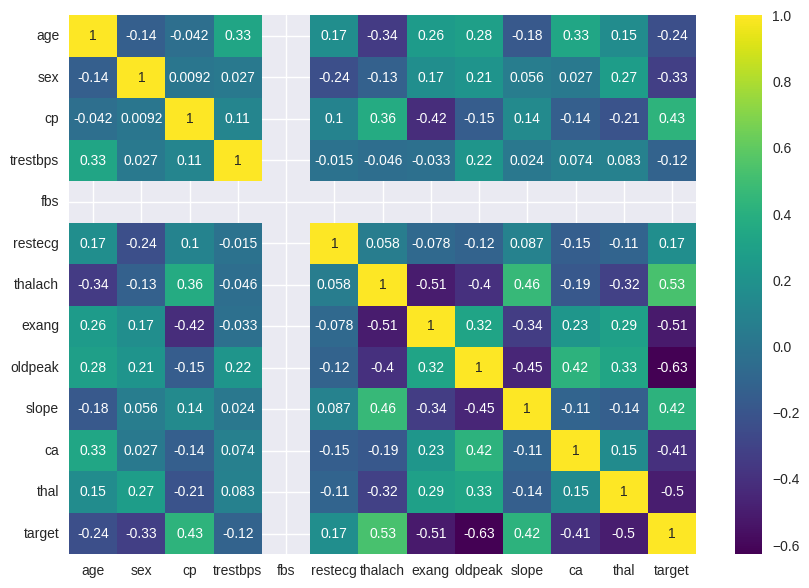

In [22]:
sns.heatmap(data=filtered_df.corr(), cmap='viridis', annot=True, annot_kws={'size':10})

Split data before modeling:

In [23]:
X, y = filtered_df.drop(columns=['target']).values, np.array(filtered_df['target']).reshape((-1, 1))

print(f'X_shape: {X.shape}\nY_Shape: {y.shape}')

X_shape: (668, 12)
Y_Shape: (668, 1)


<br>
<h2 align='center'>
<p style='background:black; color: blue'>
<b>
5| Modeling
</b>
</p>
</h2>

<h3 align='center'>
<p style='background-color: lightblue'>
<span style='color:navy'>
<b>
5.1. Split data
</b>
</span>
</p>
</h3>

In [24]:
# for split train-test:
from sklearn.model_selection import train_test_split

In [25]:
def split_train_test(X, y: float, train_size: float=0.7):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                        train_size=train_size,
                                                        random_state=24,
                                                        shuffle=True)
    
    print(f'Shape of X_train: {train_X.shape}')
    print(f'Shape of y_train: {train_y.shape}')
    print(f'Shape of X_test: {test_X.shape}')
    print(f'Shape of y_test: {test_y.shape}')
    
    return train_X, test_X, train_y, test_y

In [26]:
X_train, X_test ,y_train, y_test = split_train_test(X, y, train_size=0.8)

Shape of X_train: (534, 12)
Shape of y_train: (534, 1)
Shape of X_test: (134, 12)
Shape of y_test: (134, 1)


<br>
<h3 align='center'>
<p style='background-color: lightblue'>
<span style='color:navy'>
<b>
5.2. Builing and Applying Logistic Regression Model
</b>
</span>
</p>
</h3>

In [27]:
# for modeling:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# for evalute model's preformance:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, \
  accuracy_score, confusion_matrix, classification_report

Creating a pipeline helps streamline these steps, ensuring that each transformation is applied consistently to both the training and test data. To support model gain the best performance, we using a Pipeline.

We create a pipeline with preprocessing steps (like Standard scaling) and the logistic regression model. Train the model using the Training set, make predictions on the Testing set, and evaluate the model's performance using classification metrics.

<div class='alert alert-info' role='alert'>
<strong>Why we choose StandardScaler for Logistic Regression model?</strong>

Our model is Logistic Regression and we detected outliers in previous steps, so StandardScaler() is generally more appropriate, as it standardizes the data to have a mean of 0 and standard deviation of 1, which helps in better convergence and performance of the model.

</div>

<h4 align='center'>
<span style='color:navy'>
<b>
Builing Logistic Regression Model
</b>
</span>
</p>
</h4>

First, we build the function to find the best parameter to modeling.

In [28]:
def best_param(model, alpha, l1_ratio, X=X_train, y=y_train):
    
    '''
    Choose the best parameter for build logistic model, include alpha and l1_ratio
    Params:
        - model, X_train, y_train: our model with Training set
        - alpha, l1_ratio: list of parameters to choose the best of them
    Return:
        Dictionaries: best alpha and l1_ratio
    '''
    
    param_grid = {
        'alpha': alpha,
        'l1_ratio': l1_ratio
    }
    
    grid_search = GridSearchCV(model,
                               param_grid=param_grid,
                               cv=5,  # fold, default=5
                               scoring='neg_mean_absolute_error')
    grid_search.fit(X, y)
    
    return grid_search.best_params_

Build the Logistic model, we just use the parameter `l1_ratio` while the penalty is 'elasticnet'.

In [29]:
def build_logistic_model(X, y, solver: str, penalty: str, l1_ratio: float):
    
    '''
        Build Logistic Regression
        Params:
            X: feature matrix
            y: our target
        Return:
            our model
    '''
    
    if penalty == 'elasticnet':
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(solver=solver, penalty=penalty, l1_ratio=l1_ratio)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(solver=solver, penalty=penalty)
        )

    model.fit(X, y)

    return model

Show the performance which 4 classification metrics: Precision, Recall, Accuracy and F1-Score. 

Beside that, we show the confusion matrix and classification report.

In [35]:
def show_performance(y_true, y_pred):
    
    '''
    Show the performance of our model 
    Params:
        y_true: ground truth values
        y_pred: our prediction
    Return:
        Metrics to evalute model's performance
    '''
    
    # Todo: Return our error value like accuracy, f1score, ...
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'F1: {f1_score(y_true, y_pred)}')
    print(f'Confusion matrix:\n{confusion_matrix(y_true, y_pred)}')
    print(f'Classification report:\n{classification_report(y_true, y_pred)}')
   
    # Todo: Only choose one of them as our score
    main_score = f1_score(y_true, y_pred)
    
    return main_score


<h4 align='center'>
<span style='color:navy'>
<b>
Applying Logistic Regression Model
</b>
</span>
</p>
</h4>

In [31]:
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0]
l1_ratio = [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1]

best_param = best_param(ElasticNet(), alpha, l1_ratio)

In [32]:
choose_solver = {}

choose_solver['lbfgs'] = ['l2', None]
choose_solver['liblinear'] = ['l1', 'l2']
choose_solver['newton-cg'] = ['l2', None]
choose_solver['newton-cholesky'] = ['l2', None]
choose_solver['sag'] = ['l2', None]
choose_solver['saga'] = ['elasticnet', 'l1', 'l2', None]

In [33]:
models = pd.DataFrame(columns=['solver', 'penalty', 'f1_score'])

for solver, penalties in choose_solver.items():
    
    for penalty in penalties:
        
        model = build_logistic_model(X=X_train, y=y_train, 
                                     solver=solver, penalty=penalty,
                                     l1_ratio=best_param['l1_ratio'])
        print('-' * 30)
        print(f'Solver: {solver} - Penalty: {penalty}')
        
        pred = model.predict(X_test)
        f1 = show_performance(y_true=y_test, y_pred=pred)
        
        models = models._append(
            {
                'solver': solver,
                'penalty': penalty,
                'f1_score': f1
            }, 
            ignore_index=True
        )

------------------------------
Solver: lbfgs - Penalty: l2
Precision: 0.9770114942528736
Recall: 1.0
Accuracy: 0.9850746268656716
F1: 0.9883720930232558
Confusion matrix:
[[47  2]
 [ 0 85]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99      0.98      0.98       134
weighted avg       0.99      0.99      0.99       134

------------------------------
Solver: lbfgs - Penalty: None
Precision: 0.9770114942528736
Recall: 1.0
Accuracy: 0.9850746268656716
F1: 0.9883720930232558
Confusion matrix:
[[47  2]
 [ 0 85]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99    

Finally, we display our models with the metric f1_score:

In [34]:
display(models)

,solver,penalty,f1_score
0,lbfgs,l2,0.988372
1,lbfgs,None,0.988372
2,liblinear,l1,0.988372
3,liblinear,l2,0.988372
4,newton-cg,l2,0.988372
5,newton-cg,None,0.988372
6,newton-cholesky,l2,0.988372
7,newton-cholesky,None,0.988372
8,sag,l2,0.988372
9,sag,None,0.988372


Based on the document of Logistic Regressionn in Scikit-learn, defalut solver is ‘lbfgs’.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss.
- liblinear’ and ‘newton-cholesky’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrapt it with the `OneVsRestClassifier`.
- ‘newton-cholesky’ is a good choice for `n_samples >> n_features`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features` because it explicitly computes the Hessian matrix.

<div class='alert alert-info' role='alert'>

<strong>Conclusion</strong>

For our problem, all solvers and corresponding penalties (only saga matches all penalties). In models table, all models return F1_Score greater than 0.988 (approximate 0.99).

That is a very good parameter to ensure the model has high performance and is suitable for practical use.

</div>